In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pygmt
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import imageio

In [2]:
# Read the NetCDF files using xarray
Li1 = xr.open_dataset('../5_Simulations/physioLi/physio0Ma.nc')
Valdes1 = xr.open_dataset('../5_Simulations/model2_VAldes/physio0Ma.nc')

## Rain

In [3]:
diff_rain = Valdes1.rain - Li1.rain
diff_rain.max(), diff_rain.min()

(<xarray.DataArray 'rain' ()>
 array(3.52478727),
 <xarray.DataArray 'rain' ()>
 array(-7.21212987))

In [4]:
dt = 10
times = np.arange(0,70, dt)
files = []
sstep = np.arange(len(times))

In [5]:
times

array([ 0, 10, 20, 30, 40, 50, 60])

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


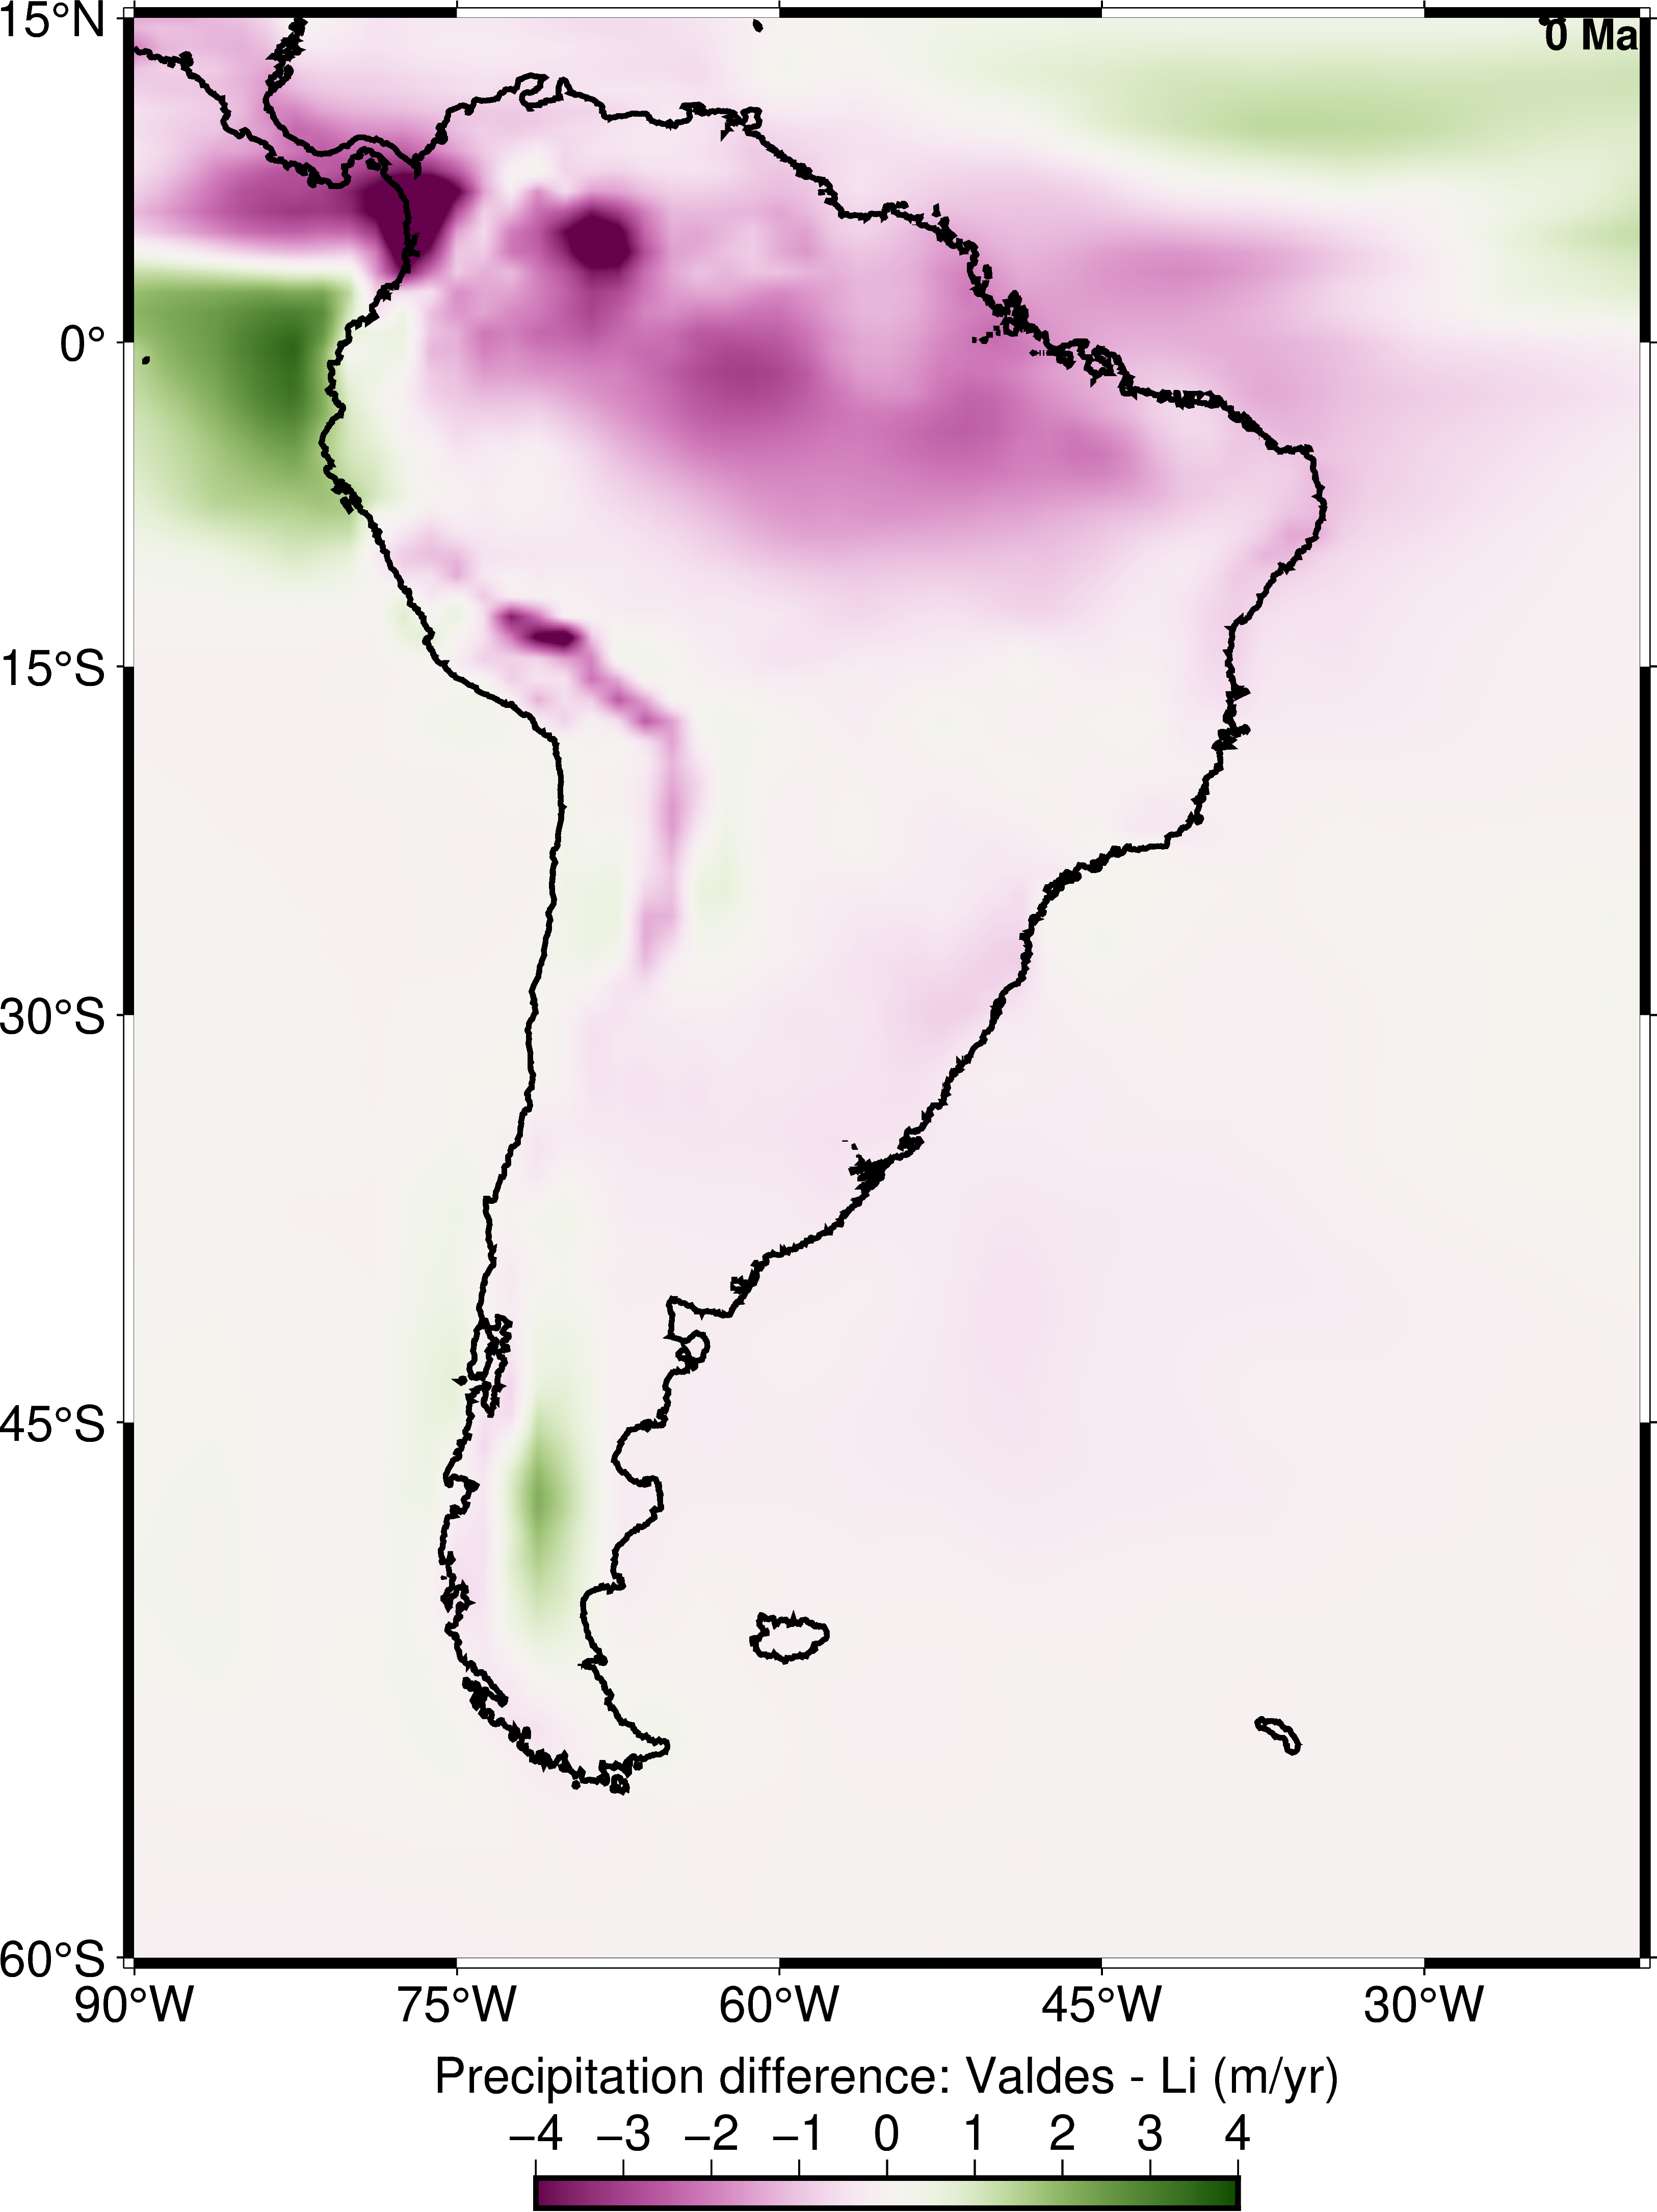

KeyboardInterrupt: 

In [7]:
for k in times:
    Li1 = xr.open_dataset('../5_Simulations/physioLi/physio'+str(k)+'Ma.nc')
    Valdes1 = xr.open_dataset('../5_Simulations/model2_VAldes/physio'+str(k)+'Ma.nc')
    diff_rain = Valdes1.rain - Li1.rain

    region = [-90, -20, -60, 15]
    fig = pygmt.Figure()
    
    with pygmt.config(FONT='14p,Helvetica,black'):
        pygmt.makecpt(cmap="bam", reverse=False, series=[-4, 4])
        fig.basemap(region=region, projection='M15c', frame='ag')
        fig.grdimage(grid=diff_rain, transparency=0)
        fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h", frame=["a1.", "x+lPrecipitation difference: Valdes - Li (m/yr)"])
        fig.grdcontour(interval=0.1, grid=Li1.zsim, limit=[0, 0.1], pen="1.5p")#, -W1p)

    
    # Time interval
    
    fig.text(text=str(k)+" Ma", position="TR", font="12p,Helvetica-Bold,black")
    
    # Define the file name for the frame
    fname = '../3_Figures/outputs/Valdes_Li_Precip'+str(k)+'Ma_new.png'
    
    # Save the frame file
    fig.show(dpi=500, width=500)
    fig.savefig(fname=fname, dpi=500)

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


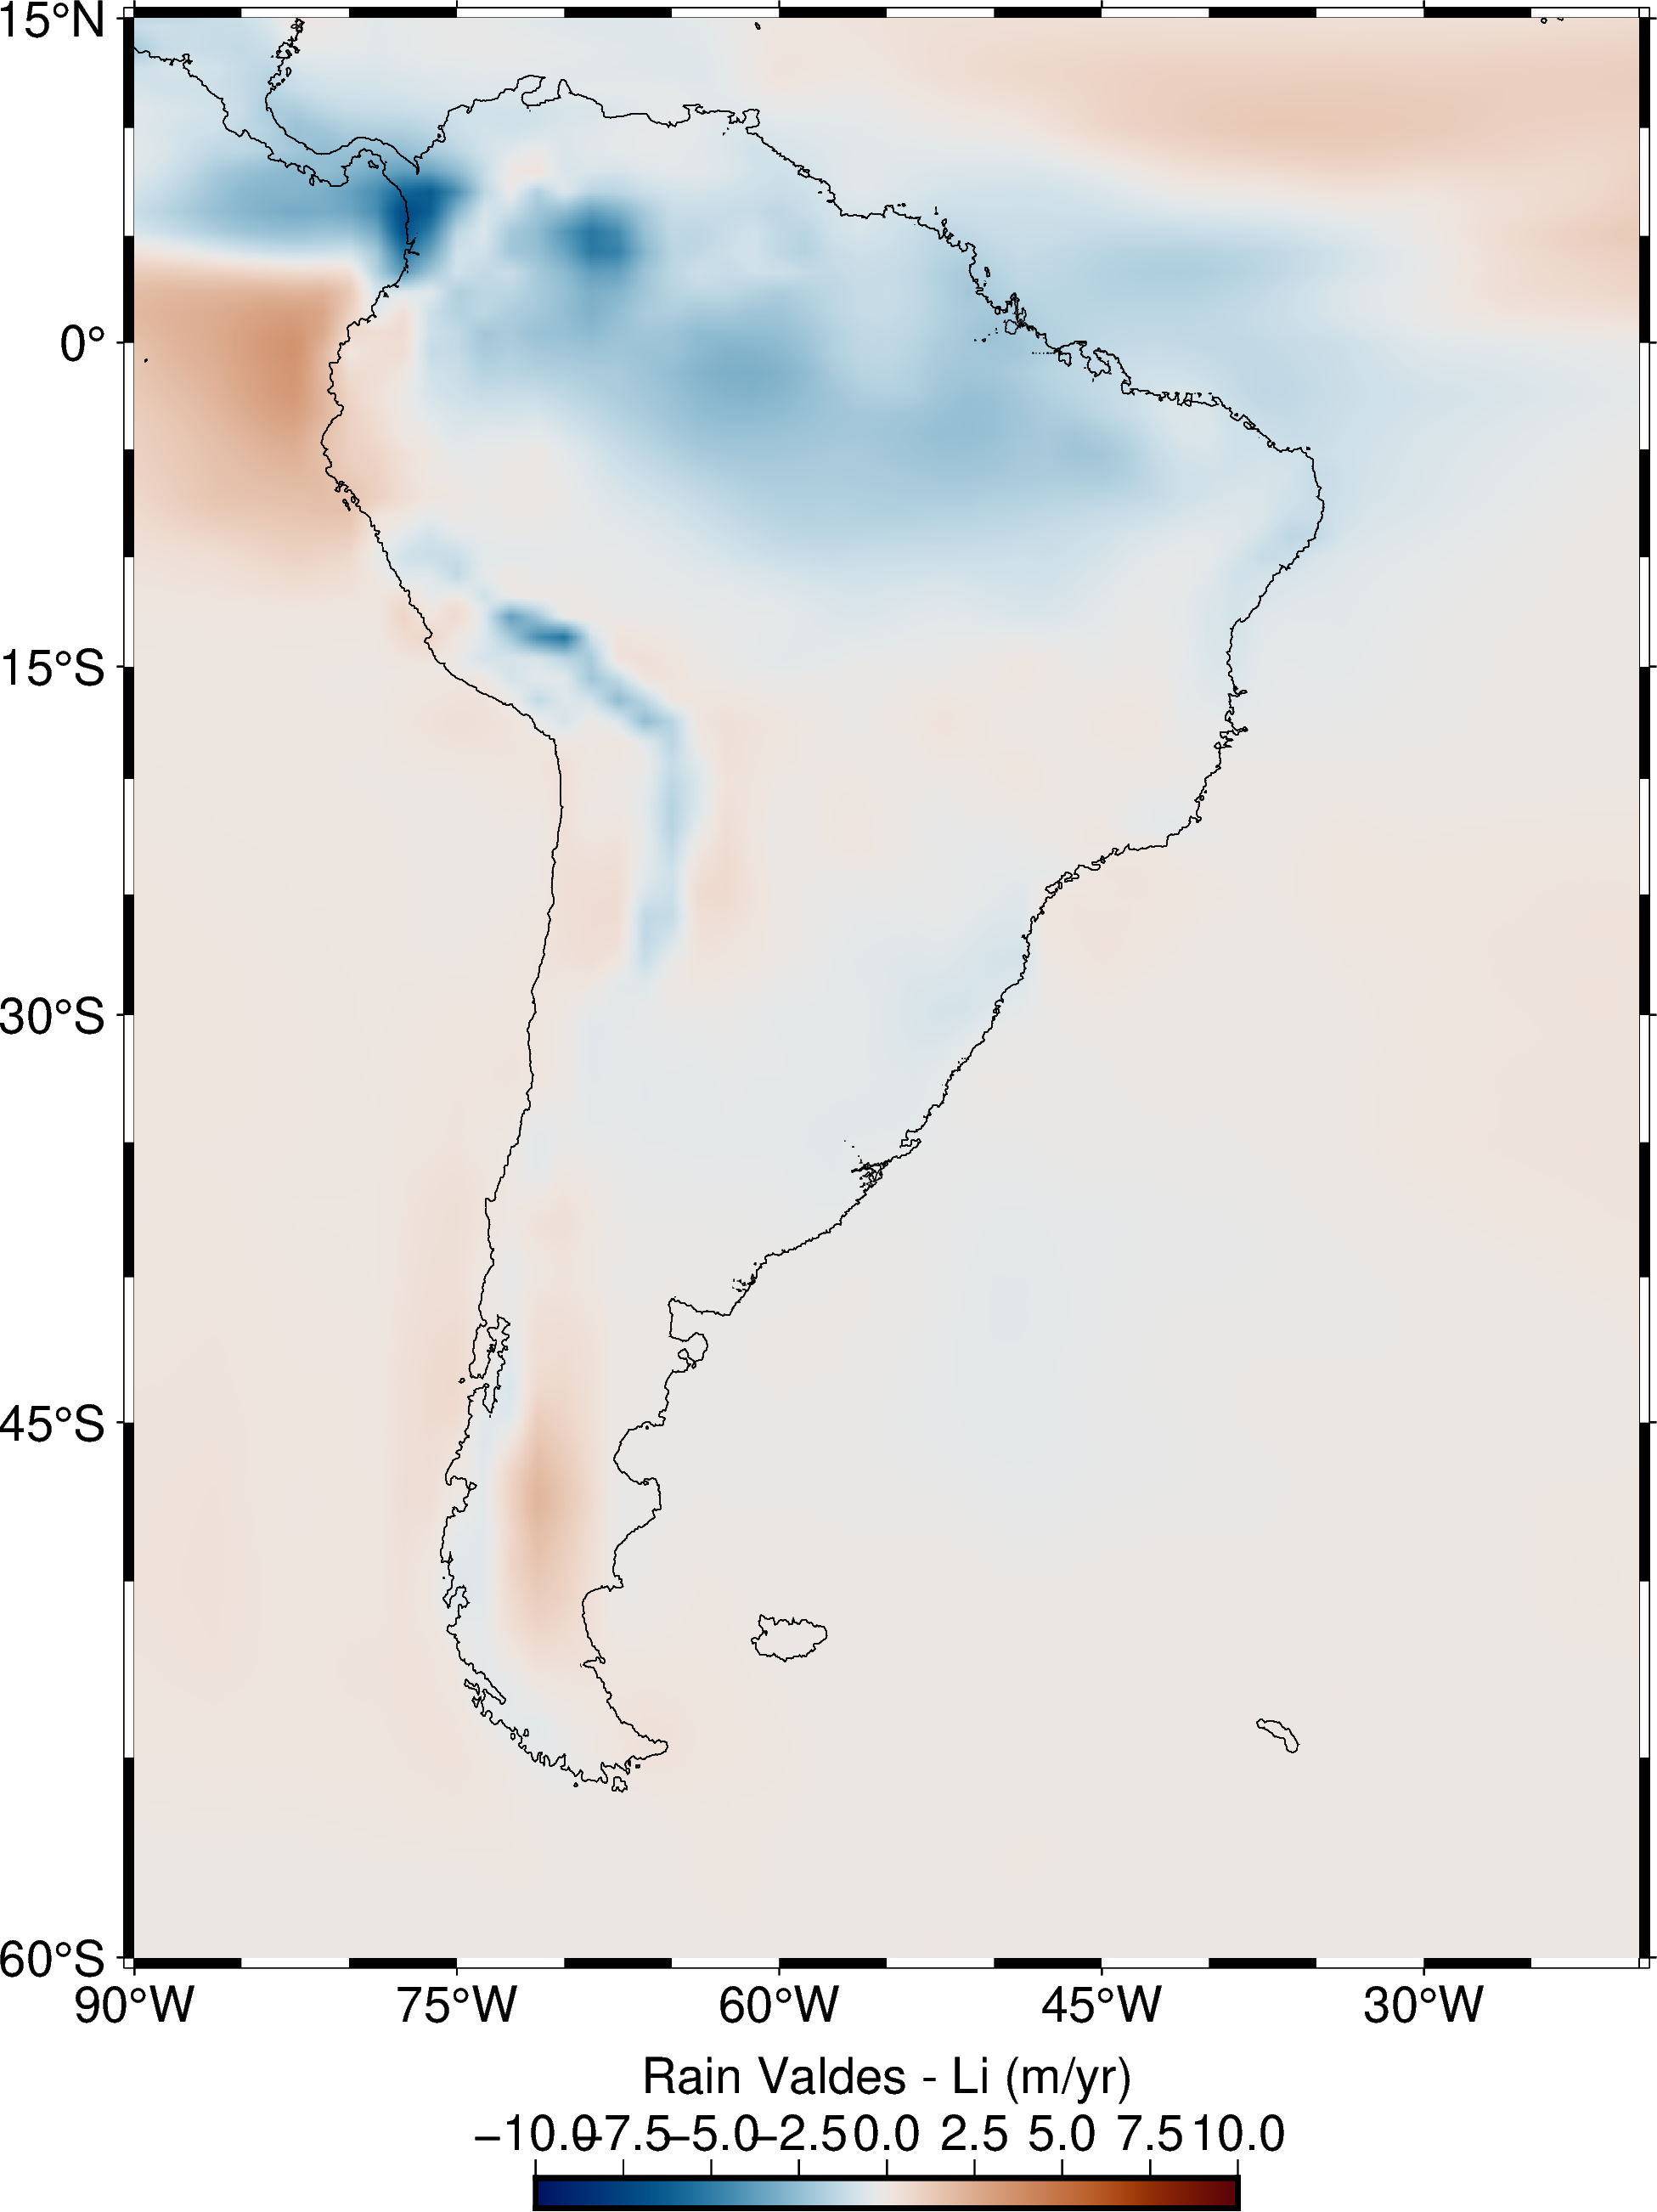

In [9]:
region = [-90, -20, -60, 15]
fig = pygmt.Figure()
with pygmt.config(FONT='14p,Helvetica,black'):
    pygmt.makecpt(cmap="panoply", reverse=False, series=[-10, 10])
    fig.basemap(region=region, projection='M15c', frame='afg')
    fig.grdimage(grid=diff_rain,transparency=0)
    fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h",frame=["a2.5", "x+lRain Valdes - Li (m/yr)"])
    fig.grdcontour(interval=0.1,grid=Li1.zsim,limit=[0, 0.1],)
fig.show(width=500)

## Erosion deposition rate

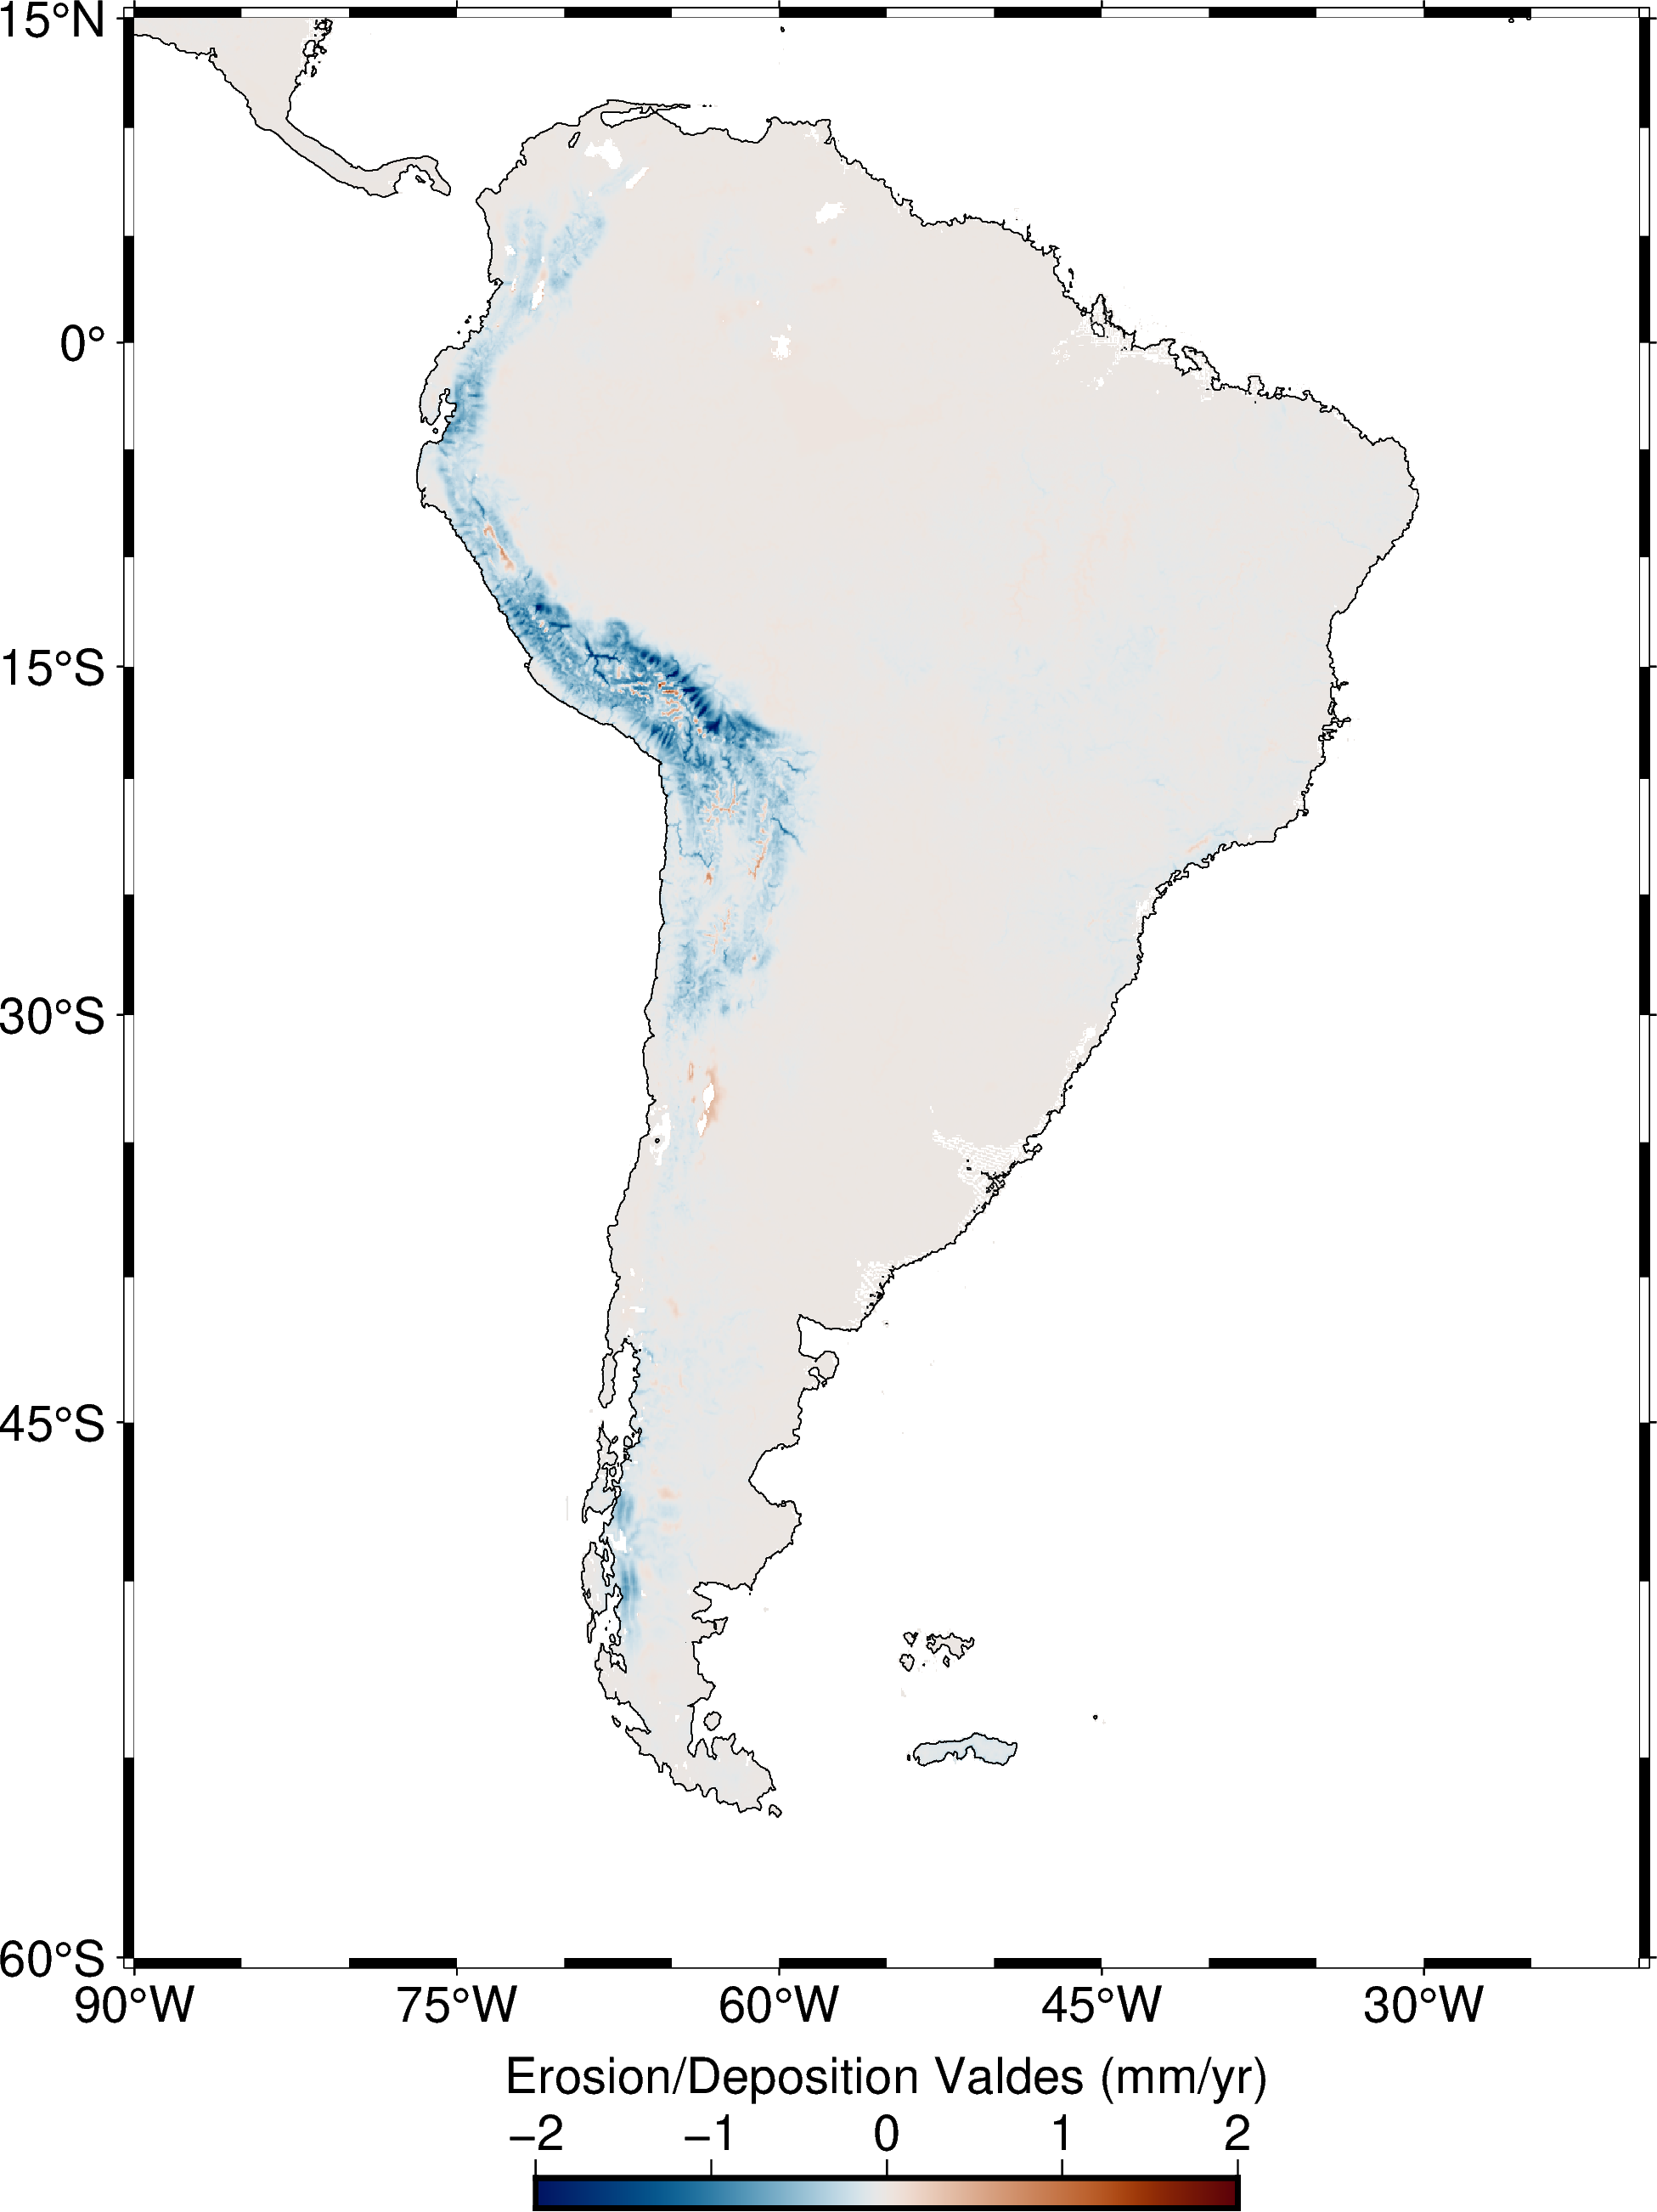

In [7]:
fig = pygmt.Figure()
with pygmt.config(FONT='14p,Helvetica,black'):
    pygmt.makecpt(cmap="vik", reverse=False, series=[-2, 2])
    fig.basemap(region=region, projection='M15c', frame='afg')
    fig.grdimage(grid=Valdes1.erorate,transparency=0)
    fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h",frame=["a1", "x+lErosion/Deposition Valdes (mm/yr)"])
    fig.grdcontour(interval=0.1,grid=Valdes1.zsim,limit=[0, 0.1],)
fig.show(width=500)

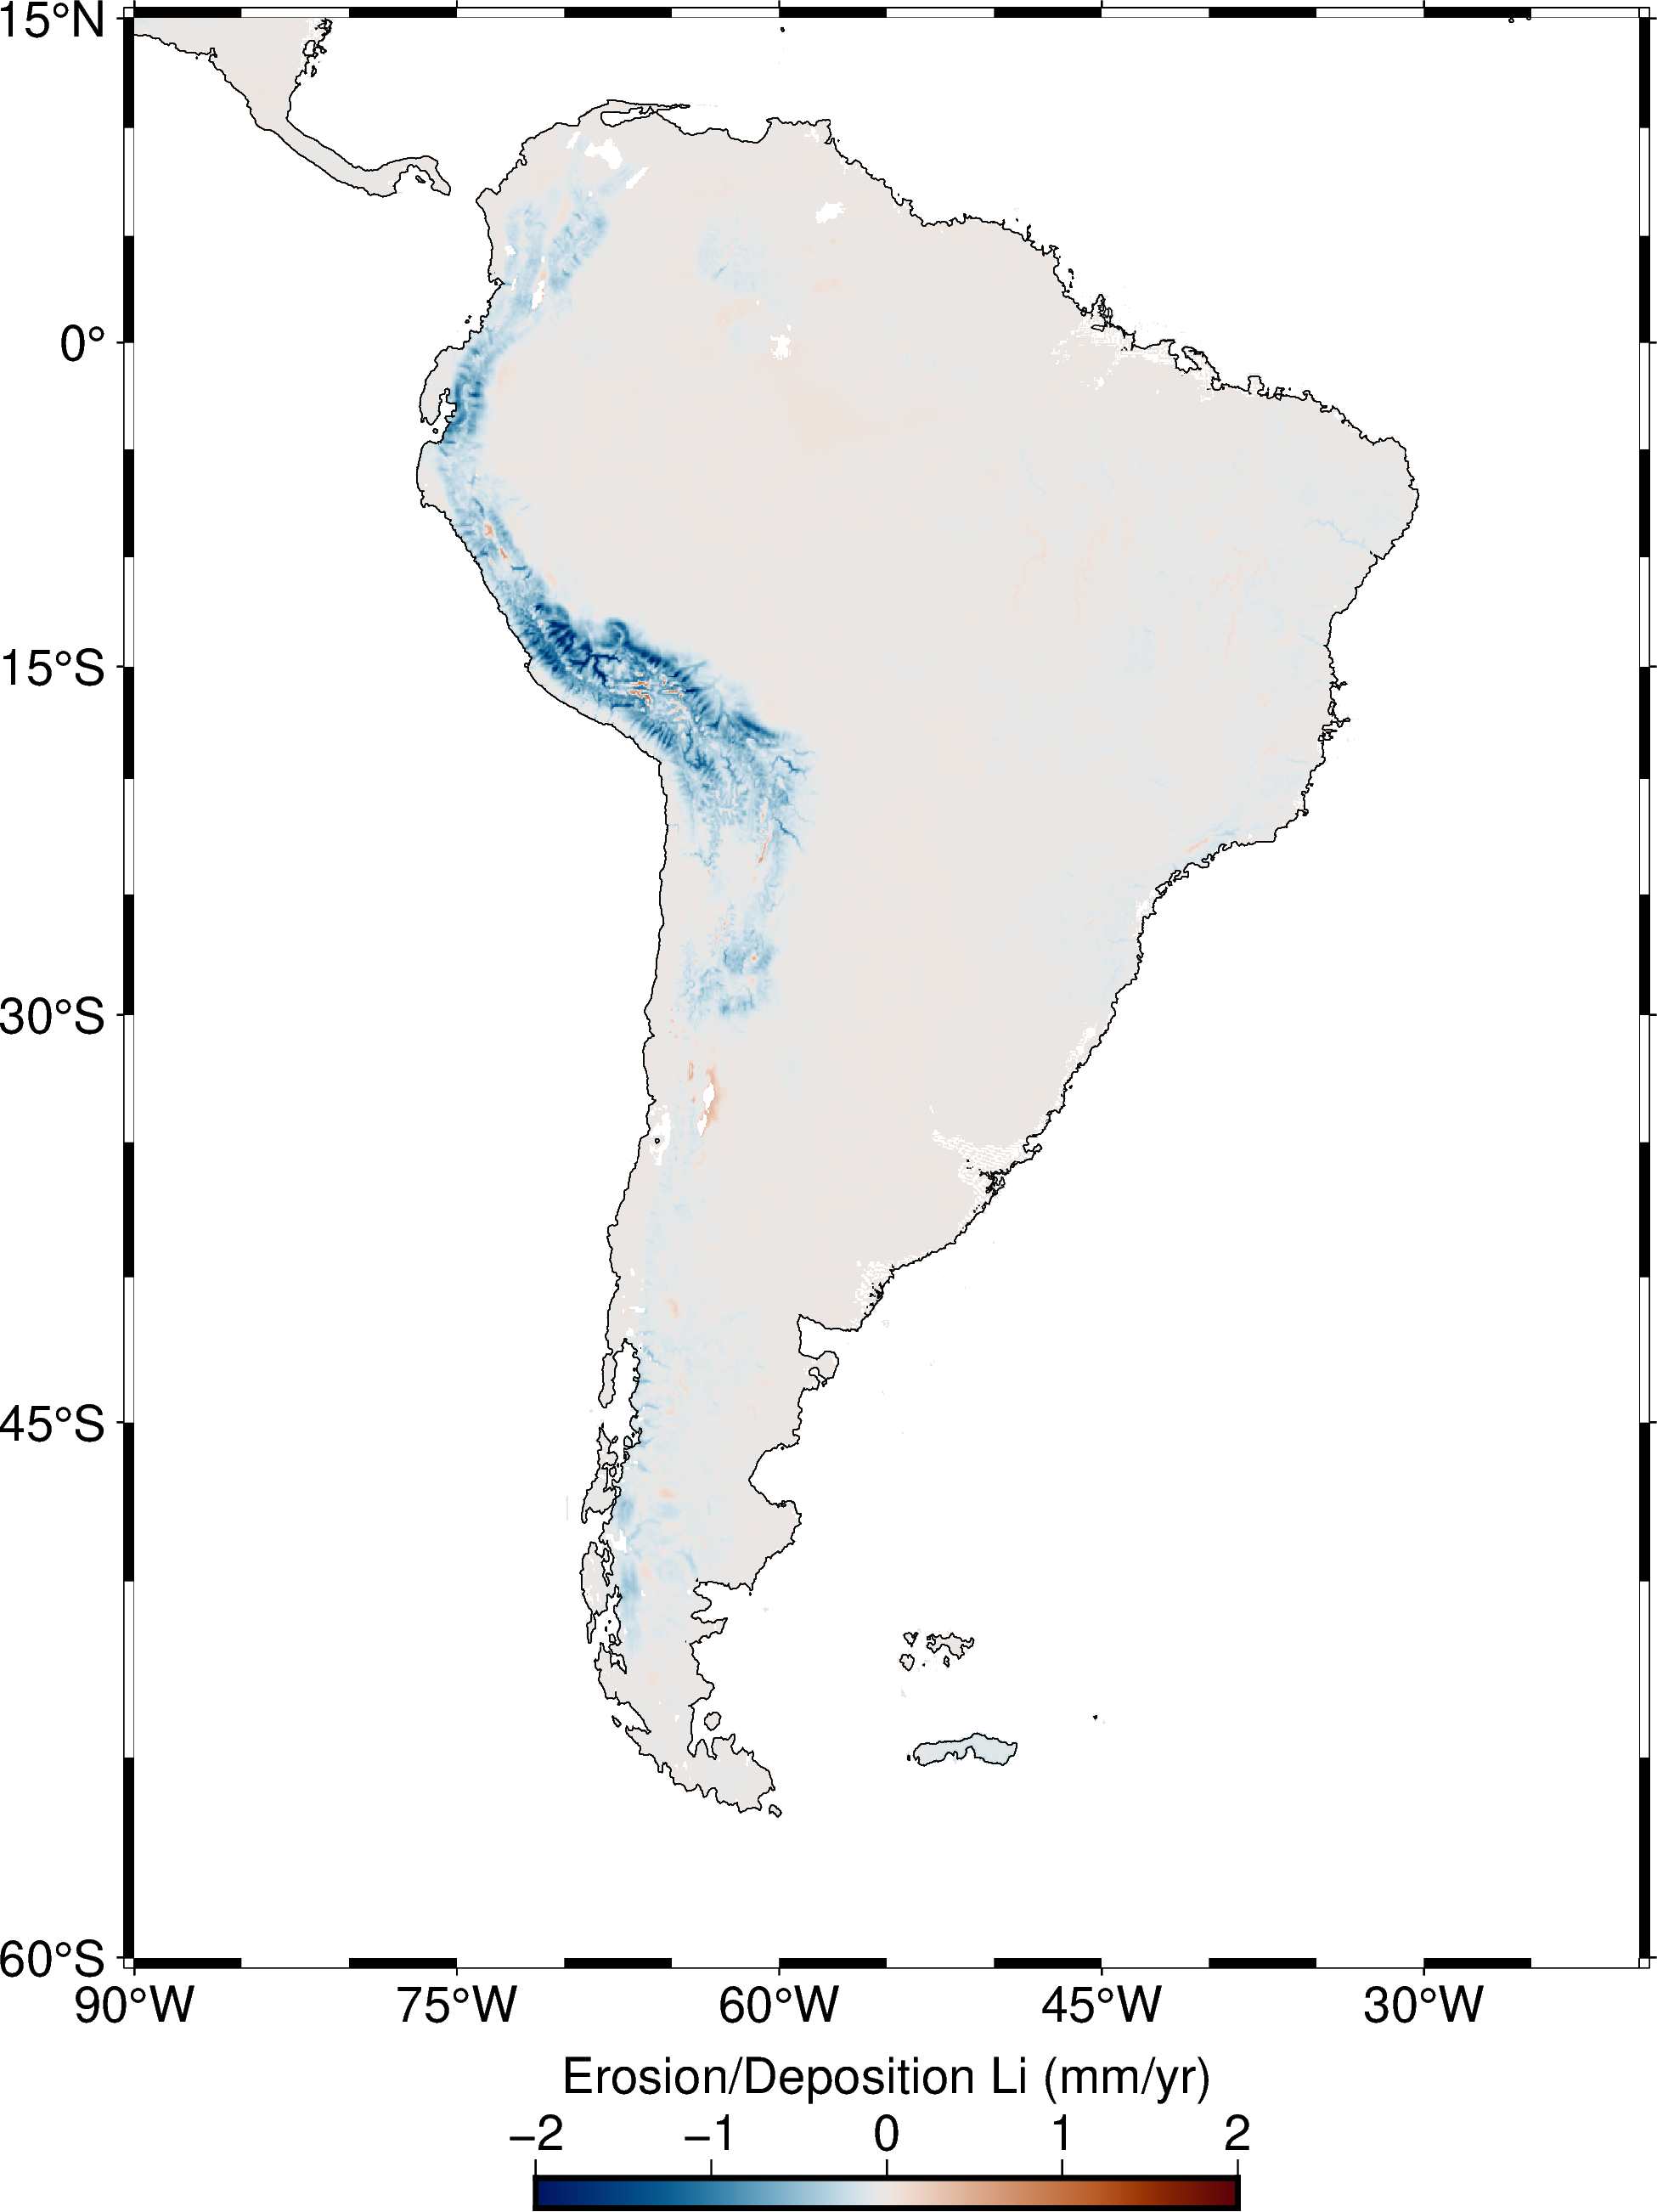

In [8]:
fig = pygmt.Figure()
with pygmt.config(FONT='14p,Helvetica,black'):
    pygmt.makecpt(cmap="vik", reverse=False, series=[-2, 2])
    fig.basemap(region=region, projection='M15c', frame='afg')
    fig.grdimage(grid=Li1.erorate,transparency=0)
    fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h",frame=["a1", "x+lErosion/Deposition Li (mm/yr)"])
    fig.grdcontour(interval=0.1,grid=Li1.zsim,limit=[0, 0.1],)
fig.show(width=500)

#### Comparison between the Li and Valdes



In [9]:
diff_erorate = Valdes1.erorate - Li1.erorate

In [10]:
Valdes1.erorate.units,Li1.erorate.units

('mm/yr', 'mm/yr')

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


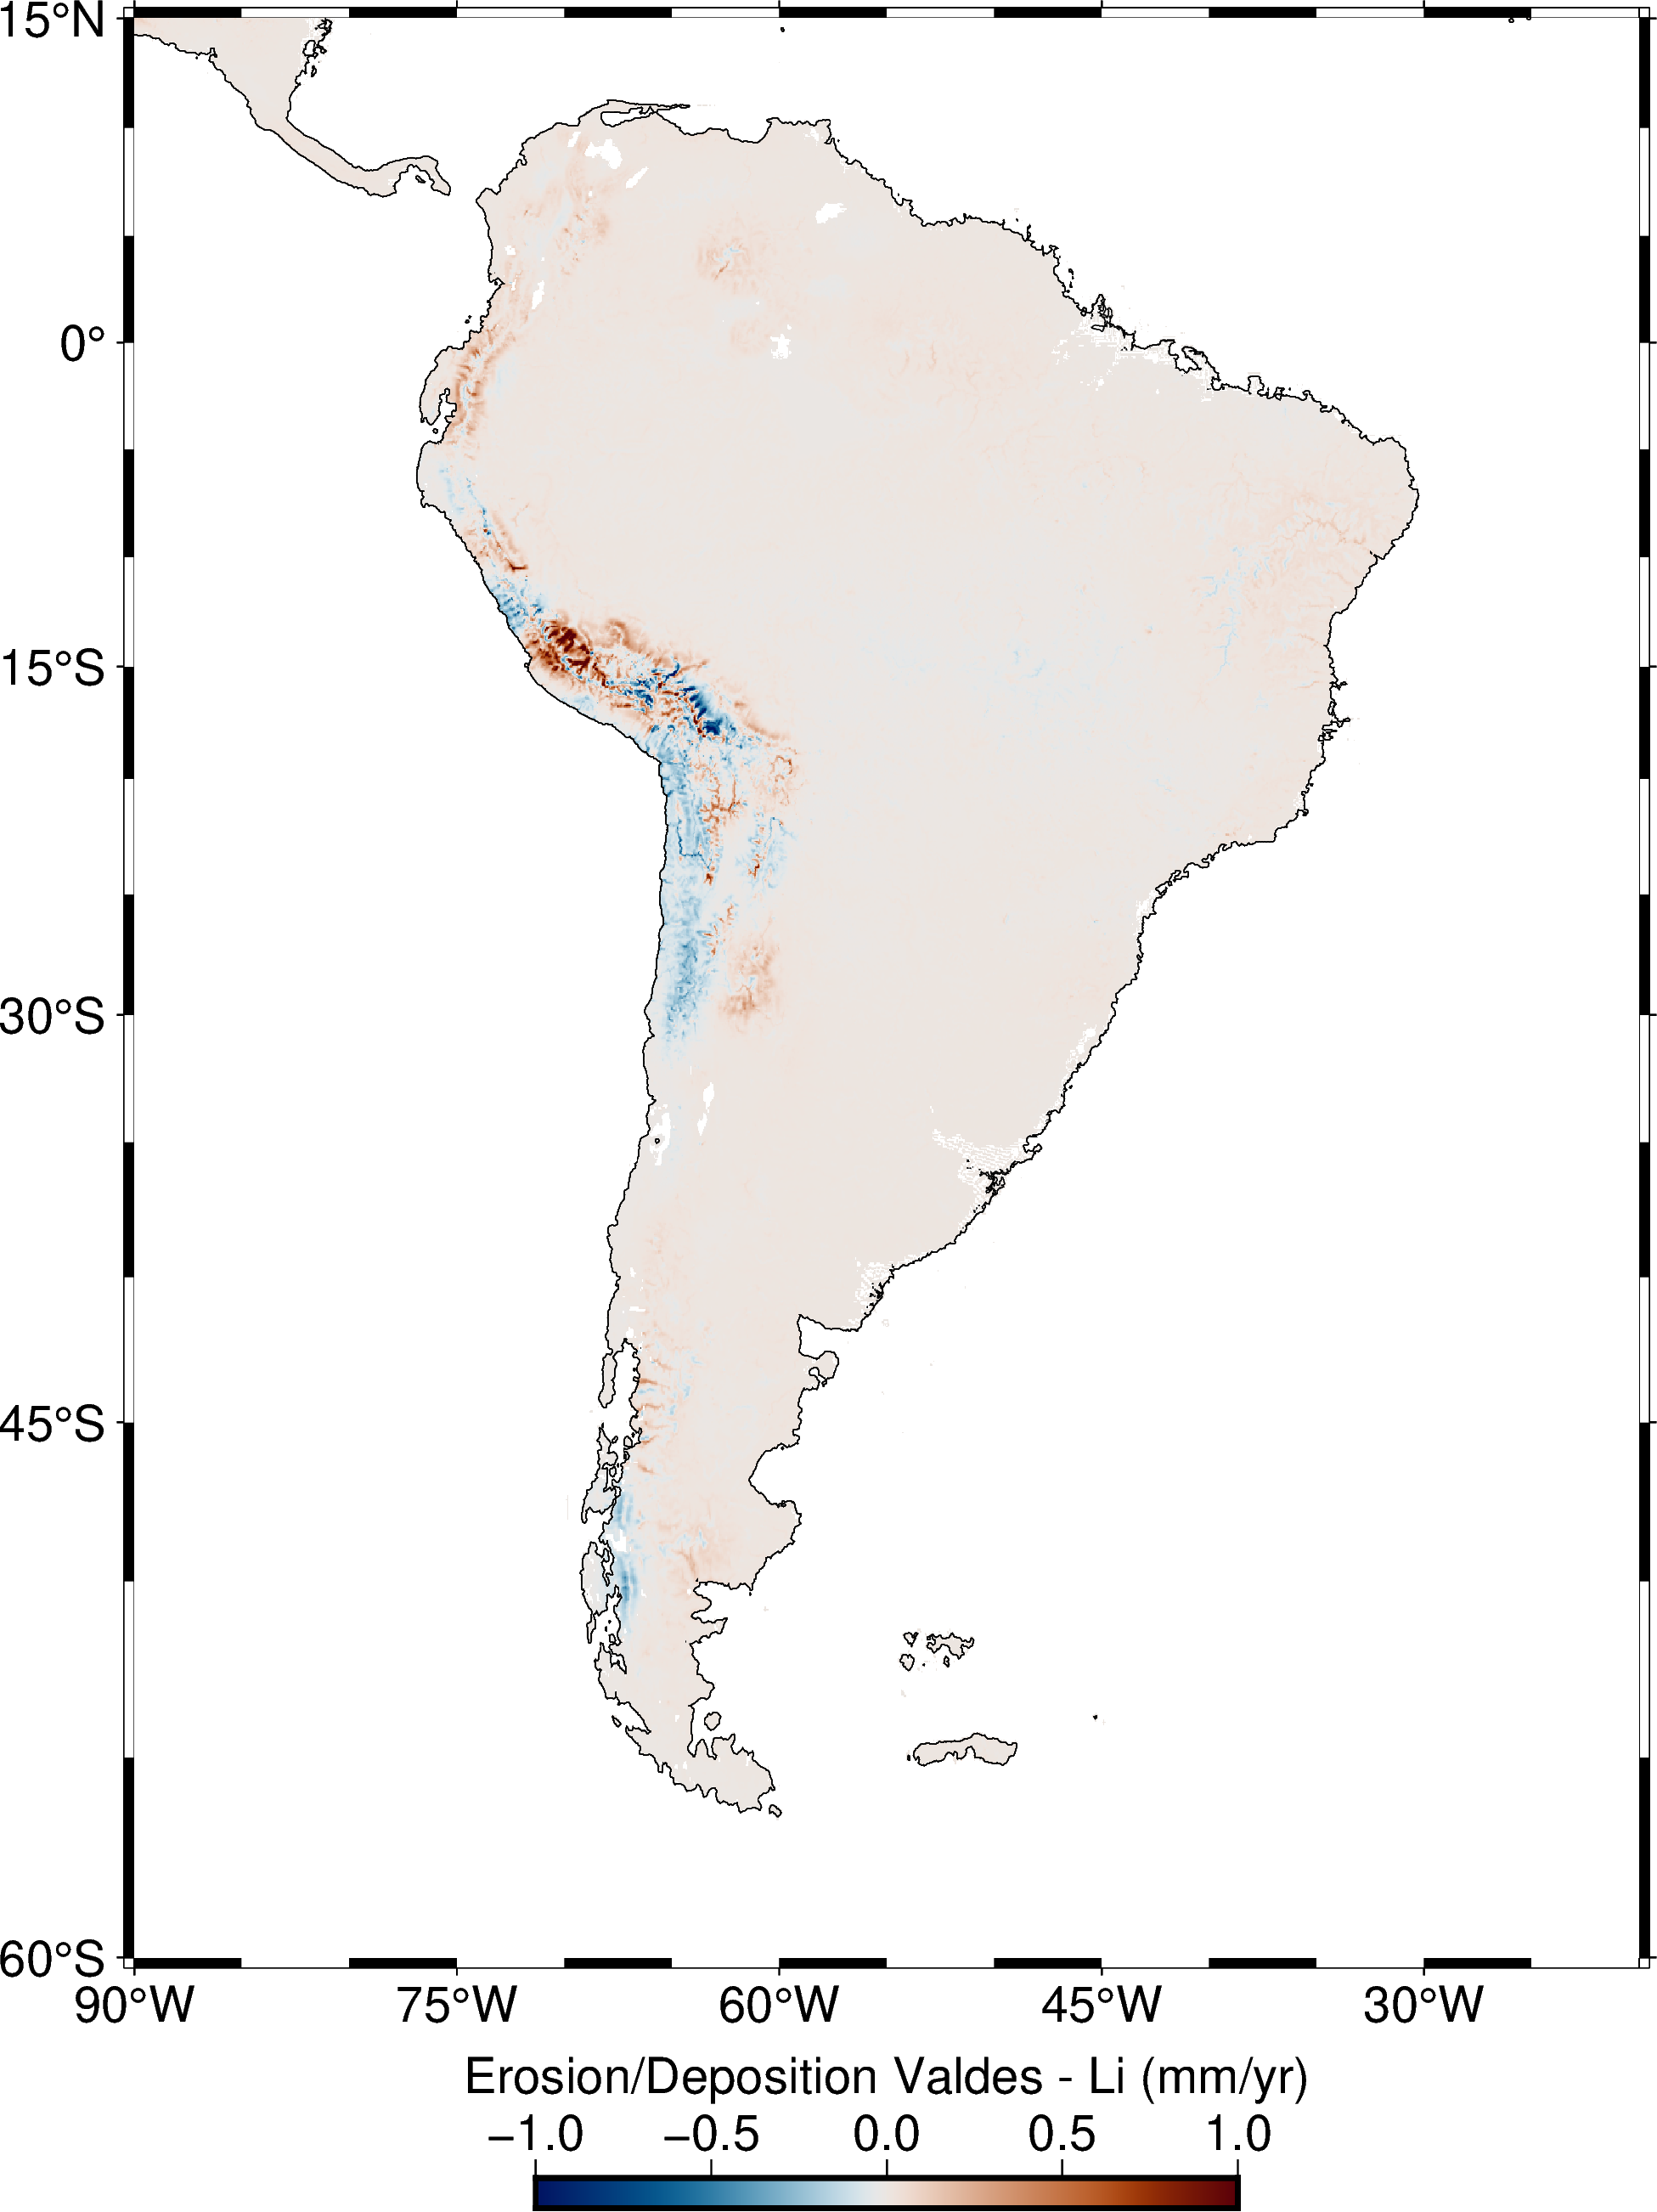

In [11]:
fig = pygmt.Figure()
with pygmt.config(FONT='14p,Helvetica,black'):
    pygmt.makecpt(cmap="vik", reverse=False, series=[-1, 1])
    fig.basemap(region=region, projection='M15c', frame='afg')
    fig.grdimage(grid=diff_erorate,transparency=0)
    fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h",frame=["a0.5", "x+lErosion/Deposition Valdes - Li (mm/yr)"])
    fig.grdcontour(interval=0.1,grid=Li1.zsim,limit=[0, 0.1],)
fig.show(width=500)

## Science paper data

In [12]:
Valdes0 = xr.open_dataset('../5_Simulations/getMinesPos/outputs/sim/data20Ma.nc')


In [13]:
Valdes0.erodep.units


'metres'

In [14]:
Valdes0.erodep.min(),Valdes0.erodep.max()


(<xarray.DataArray 'erodep' ()>
 array(-10137.53696581),
 <xarray.DataArray 'erodep' ()>
 array(13921.27158406))

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


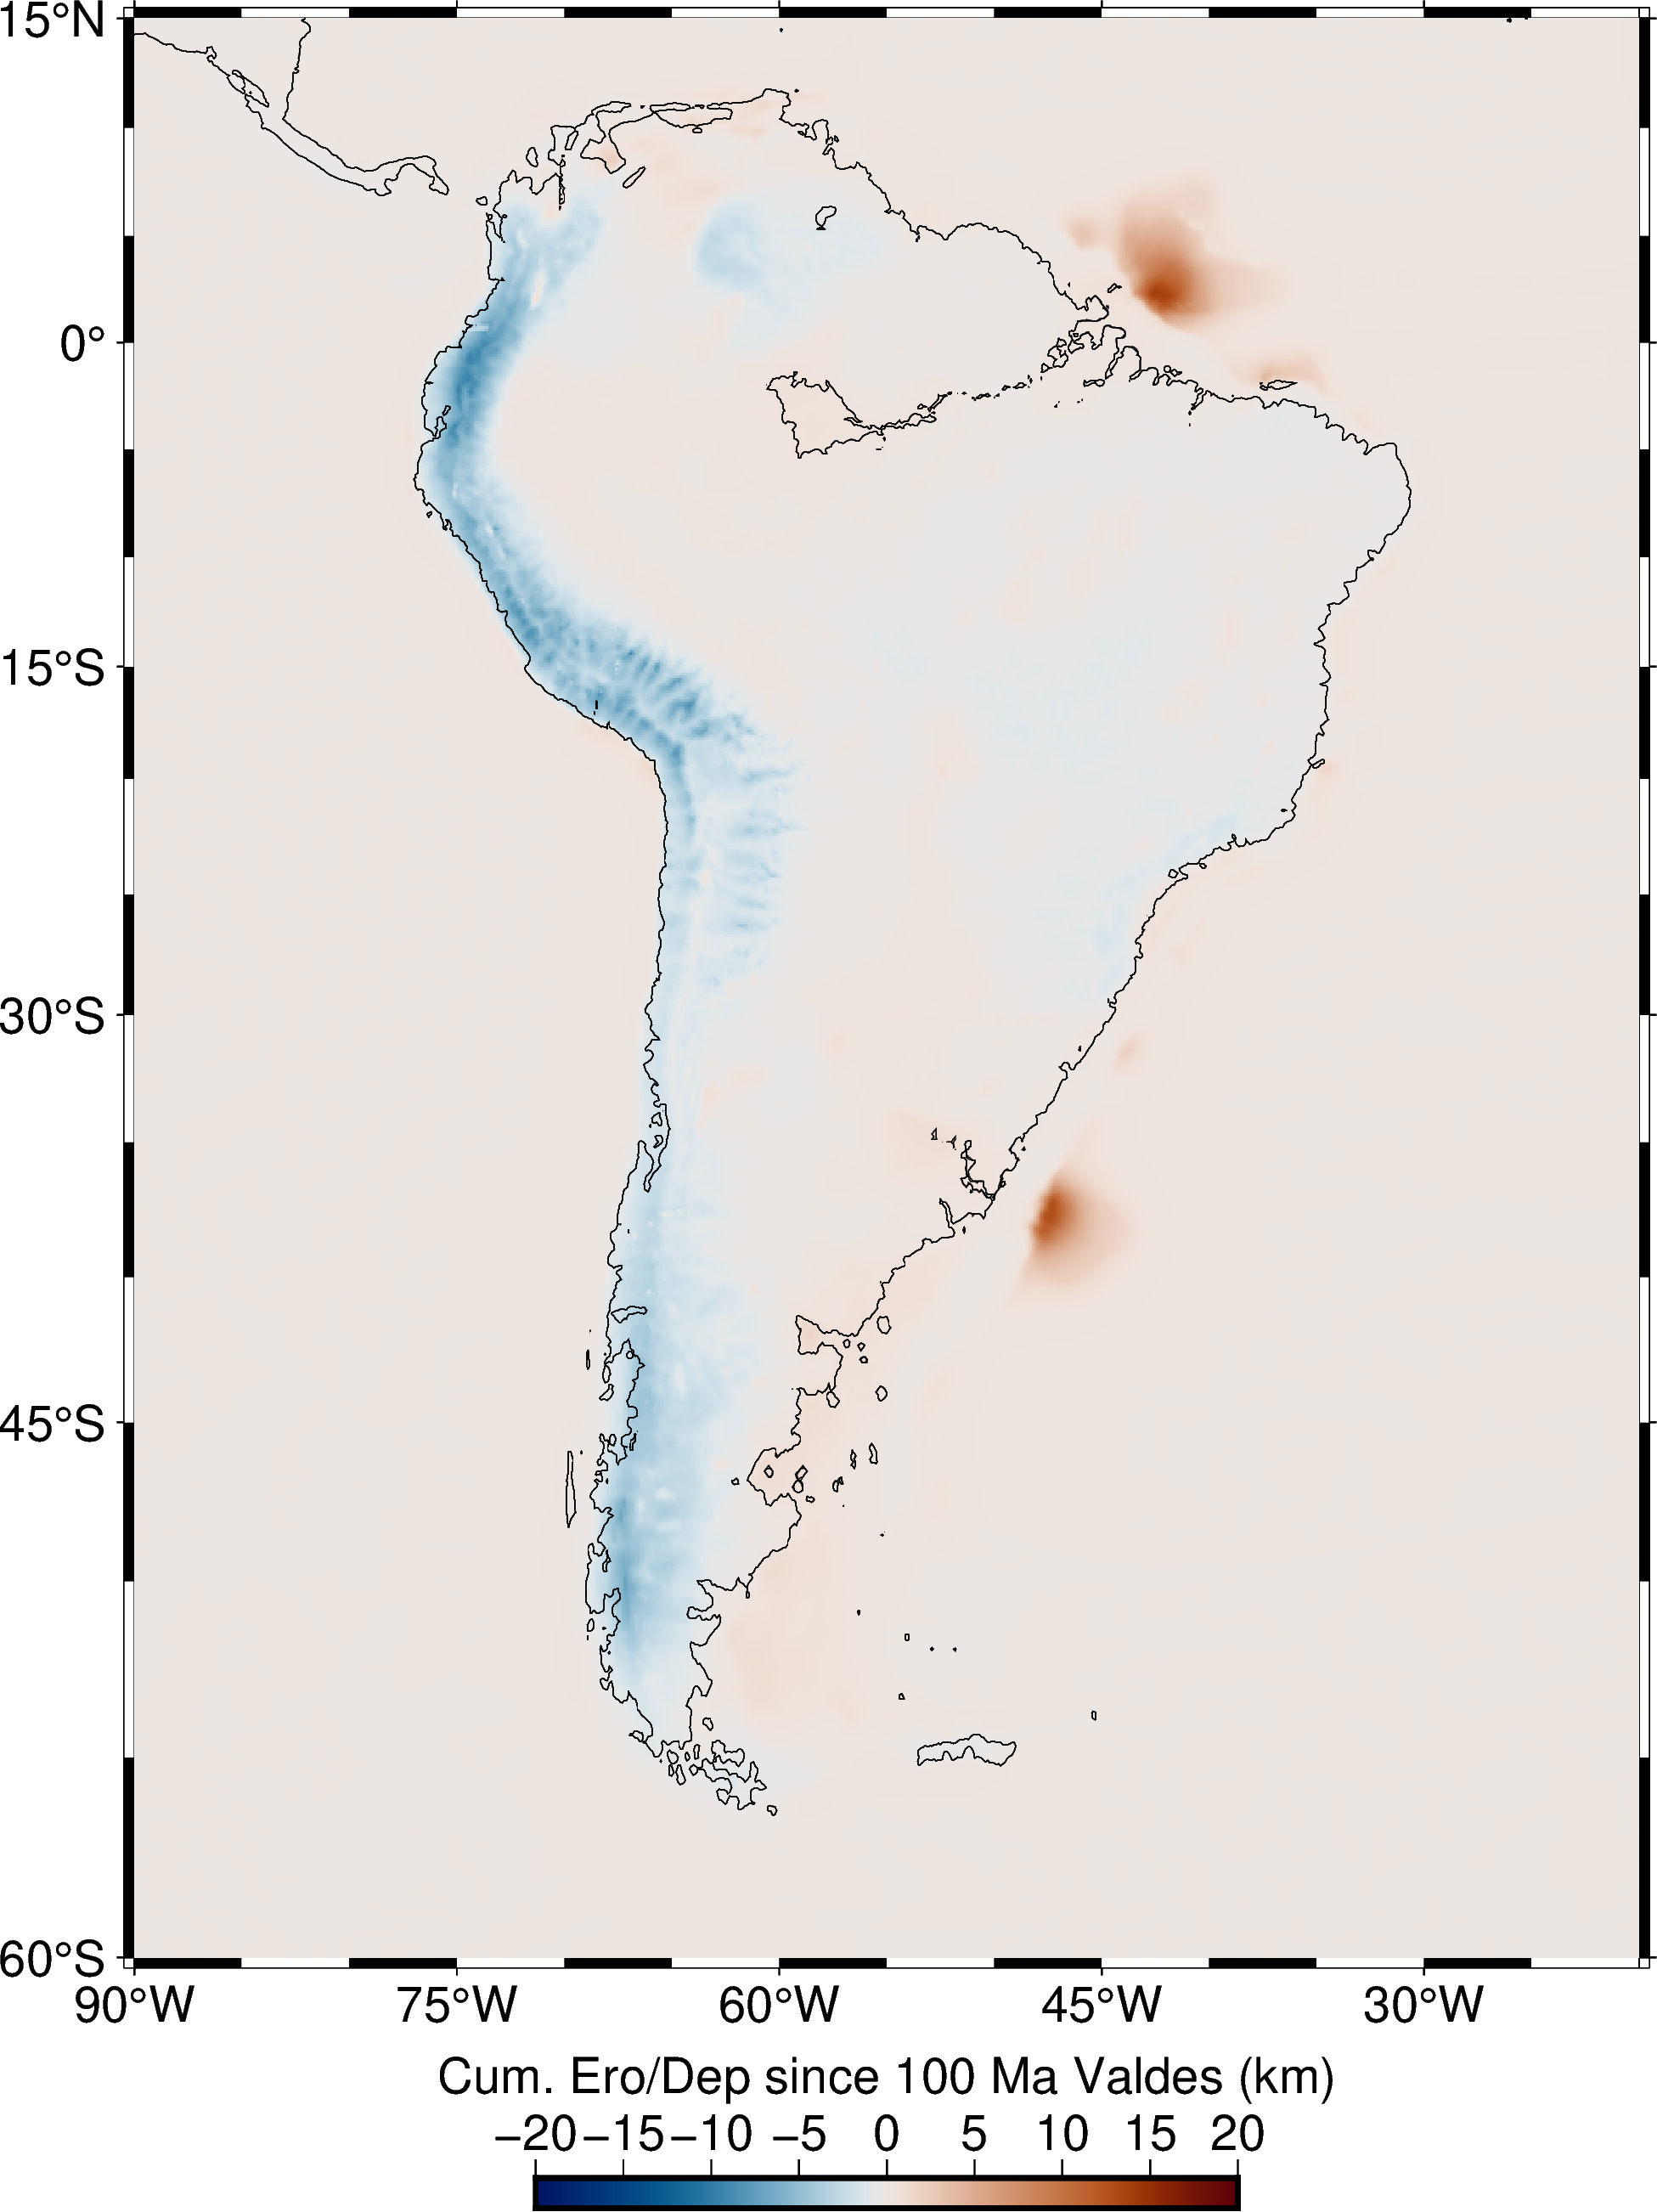

In [15]:
fig = pygmt.Figure()
with pygmt.config(FONT='14p,Helvetica,black'):
    pygmt.makecpt(cmap="vik", reverse=False, series=[-20, 20])
    fig.basemap(region=region, projection='M15c', frame='afg')
    fig.grdimage(grid=Valdes0.erodep/1000,transparency=0)
    fig.colorbar(position="jBC+o0c/-2.5c+w7c/0.3c+h",frame=["a5", "x+lCum. Ero/Dep since 100 Ma Valdes (km)"])
    fig.grdcontour(interval=0.1,grid=Valdes0.elevation,limit=[0, 0.1],)
fig.show(width=500)

In [16]:
Valdes0 = xr.open_dataset('../5_Simulations/getMinesPos/outputs/sim/data0Ma.nc')


In [18]:
Valdes0.erodep.min(), Valdes0.erodep.max()

(<xarray.DataArray 'erodep' ()>
 array(-16093.04542455),
 <xarray.DataArray 'erodep' ()>
 array(19632.30104371))